# Auditory analysis

In [4]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap
import os
import pandas as pd 

## individual plots to show time spent in roi/stimulus per trial per mouse

In [7]:

main_dir = "C:/Users/aleja/Box/Awake Project/Maze data/Auditory experiments/8_arms_w_voc (1)"

trials_csvs = []
video_paths = []

working_trials_csvs = []

for day in os.listdir(main_dir):
    exp_day_dir = main_dir + "/" + day
    # print(day)
    for mouse in os.listdir(exp_day_dir):
        mouse_data_dir = exp_day_dir + "/" + mouse
        # print(mouse)
        for data in os.listdir(mouse_data_dir): 

            if "trials_time" in data and ".csv" in data and ".bak" not in data:

                CSV_FILE = mouse_data_dir+"/"+data
                trials_csvs.append(CSV_FILE)
                trial_df = pd.read_csv(CSV_FILE)

                figures (CSV_FILE)

                if 'time_in_maze_ms' in trial_df.columns and "time_in_maze_s" in trial_df.columns:
                    working_trials_csvs.append(mouse_data_dir+"/"+data)

                

            elif ".mp4" in data:
                
                video_paths.append(mouse_data_dir+"/"+data)
                pass
        



# trials_csvs

# print(len(working_trials_csvs))
# video_paths


NotADirectoryError: [WinError 267] The directory name is invalid: 'C:/Users/aleja/Box/Awake Project/Maze data/Auditory experiments/8_arms_w_voc (1)/all_mice_summary.csv'

below is `fix_trial2` , some w1_d2 to d4 had trial_ID 2 showing interval_ratio and interval_name the same. It has been fixed in the main code. This fixes the csvs posthoc

In [ ]:
# from pathlib import Path
# import pandas as pd


def fix_trial2(csv_path):
    # fixing the intervals in trials 2
    intervals_names = ['none', "unison", "min_2", "maj_2", "min_3", "maj_3", 
                    "perf_4", "tritone", "perf_5", "min_6", "maj_6", 
                    "min_7", "maj_7", "octave"]
    intervals_ratios = ['0', '1/1', '16/15', '9/8', '6/5', '5/4', 
                        '4/3', '45/32', '3/2', '8/5', '5/3', 
                        '16/9', '15/8', '2/1']
    interval_map = dict(zip(intervals_ratios, intervals_names))

    df = pd.read_csv(csv_path)


    # print(df.index[df["trial_ID"] == 2])

    for idx in df.index[df["trial_ID"] == 2]:
        ratio = df.at[idx, "interval_ratio"]
        df.loc[idx, "interval_name"] = interval_map[ratio]


    df.to_csv(csv_path, index=False)

# def add_voc_deets(csv_path): 
#     pass
    


# for i in trials_csvs:

#     df = pd.read_csv(i)

#     if "w1_d2" in i :
#         # fix_trial2(i)
#         print(f"working on {i}")


below is the code used to remove extra stuff that wasn't supposed to be there and that by mistake deleted some data so please don't use and be careful next time when deleting stuff iterating through directories

In [ ]:

# main_dir = "C:/Users/aleja/Box/Awake Project/Maze data/Auditory experiments/8_arms_w_voc (1)"

# for i in os.listdir(main_dir):
#     days_dir = main_dir + '/' + i
#     print(i)
#     for culo in os.listdir(days_dir):
#         # print (culo)
#         session = days_dir + '/' + culo
#         for trial in os.listdir(session):
#             path_of_trial = session + '/' + trial

#             # print(trial)

#             if ".csv_trial" in trial or ".csv." in trial or "csv(2)" in trial:
#                 print(trial)
#                 # os.remove(path_of_trial)


#             # # if "trials_time" in trial and ".csv" in trial: 
#             # #     print(trial)
            

#             # if ".csv_trial_grid" in trial or "csv(2)" in trial or '.csv.bak':
#             #     print(path_of_trial)
#             #     # os.remove(path_of_trial)

                

w1_d1
w1_d2
w1_d3
w1_d4
w2_sequences
w2_vocalisations
w2_voc_copy


below is `modify_voc_csv` the function that shortens the names of the voc files in the w2_vocalisations experiments

In [ ]:
def modify_voc_csv(CSV_FILE):
    df = pd.read_csv(CSV_FILE)

    # df.fillna(0, inplace=True) 
    

    for idx in df.index[df["frequency"] != 0]:
        # print(len(df.loc[idx, "frequency"]))

        if len(df.loc[idx, "frequency"]) > 50:
            df.loc[idx, "frequency"] = df["frequency"][idx][68:-4]

    df.to_csv(CSV_FILE, index=False)





# for i in trials_csvs:
#     if "vocalisations" in i: 
#         modify_voc_csv(i)




# for i in df["frequency"].unique():
#     print(i[68:-4])

# if "w1_d1" in CSV_FILE:
#     for i in df["temporal_modulation"].unique():
#         print(i)

#     for i in df["sound_type"].unique():
#         print(i)

# if "interval_type" in df.columns and "w1" in CSV_FILE:

    

    


#     for i in df["interval_type"].unique():
#         print(i)

#     for i in df["frequency"].unique():
#         print(i)

#     for i in df["interval_name"].unique():
#         print(i)

#     for i in df["interval_ratio"].unique():
#         print(i)


# elif "w2" in CSV_FILE and "pattern" in df.columns:
#     for i in df["pattern"].unique():
#         print(i)

#     for i in df["frequency"].unique():
#         print(i[:27])

# else:
#     for i in df["frequency"].unique():
#         print(i[68:-4])



In [163]:
# print(len(trials_csvs))

CSV_FILE_w1 = pd.read_csv(trials_csvs[10])



# print(CSV_FILE_w1.iloc[:,2])

for idx in CSV_FILE_w1.index[CSV_FILE_w1 ["trial_ID"] == 1]:
    # print(len(df.loc[idx, "frequency"]))
    CSV_FILE_w1.iloc[idx, 2] = "habituation"

    # print(CSV_FILE_w1.loc[idx, "trial_ID"], CSV_FILE_w1.iloc[idx,2])

print(CSV_FILE_w1.head(24))
# CSV_FILE_w1.loc[idx, "frequency"] = CSV_FILE_w1 ["frequency"][idx][68:-4]

    trial_ID  ROIs                    frequency interval_type interval_ratio  \
0          1  ROI1                  habituation  silent_trial           none   
1          1  ROI2                  habituation  silent_trial           none   
2          1  ROI3                  habituation  silent_trial           none   
3          1  ROI4                  habituation  silent_trial           none   
4          1  ROI5                  habituation  silent_trial           none   
5          1  ROI6                  habituation  silent_trial           none   
6          1  ROI7                  habituation  silent_trial           none   
7          1  ROI8                  habituation  silent_trial           none   
8          2  ROI1                 vocalisation       control              0   
9          2  ROI2                            0       control              0   
10         2  ROI3               [15000, 15000]        smooth            1/1   
11         2  ROI4               [15000,

below is the function `figures` to generate the individual plots per mouse that show the time spent in the rois per trial 

In [5]:


def figures(CSV_FILE,  SAVE_FIG=True, FIG_DPI=150):
    CSV_FILE = str(CSV_FILE)  # allow Path or str
    df = pd.read_csv(CSV_FILE)
    p = Path(CSV_FILE)


    metric_name = "time_spent"
    ylab = "Time in ROI (ms)"

    #ensure ROI order & required basics
    roi_order = [f"ROI{i}" for i in range(1, 9)]
    if "ROIs" not in df.columns:
        raise ValueError("Column 'ROIs' not found in CSV.")
    df = df[df["ROIs"].isin(roi_order)].copy()
    df["ROIs"] = pd.Categorical(df["ROIs"], categories=roi_order, ordered=True)

    if "trial_ID" not in df.columns or "time_spent" not in df.columns:
        raise ValueError("CSV must include 'trial_ID' and 'time_spent'.")

    
    s = str(p.as_posix()).lower()
    has_intervals = ("interval_type" in df.columns) and ("interval_name" in df.columns)

    # Build ONE label column 'plot_label' used for colors & annotations
    if "w1" in s and has_intervals:
        # Interval mapping view
        required = {"interval_type", "interval_name"}
        missing = required - set(df.columns)
        if missing:
            raise ValueError(f"Missing interval columns: {missing}")
        df["plot_label"] = df.apply(lambda r: f"({r['interval_type']}, {r['interval_name']})", axis=1)

    elif "w2_sequences" in s:
        # Sequences: pattern + frequency (frequency may be long -> cast to str)
        if "pattern" not in df.columns or "frequency" not in df.columns:
            raise ValueError("Expected 'pattern' and 'frequency' for w2_sequences.")
        df["plot_label"] = df.apply(lambda r: f"({r['pattern']}, {str(r['frequency'])})", axis=1)

    elif "w2_vocalisations" in s:
        # Vocalisations: try a specific label if present; else (sound_type, frequency)
        # Common columns you might have: 'sound_type', 'frequency', 'vocal_id', 'call_name'

         df["plot_label"] = df["frequency"].astype(str)

    elif "w1" in s and not has_intervals :
        # Default (w1_* sessions): (frequency, sound_type)
        if "frequency" not in df.columns or "sound_type" not in df.columns:
            raise ValueError("Expected 'frequency' and 'sound_type' columns.")
        df["plot_label"] = df.apply(lambda r: f"({r['frequency']}, {r['sound_type']})", axis=1)

    # --- color map based on unique labels (stable) ---
    labels = sorted(df["plot_label"].astype(str).unique(), key=str)
    cmap = plt.get_cmap("tab20")
    label_to_color = {lab: cmap(i % cmap.N) for i, lab in enumerate(labels)}

    # --- 3x3 grid of trials (1..9) ---
    trial_ids = sorted(df["trial_ID"].unique())[:9]
    fig, axes = plt.subplots(3, 3, figsize=(16, 12), sharey=True)
    axes = axes.ravel()

    custom_titles = [
    "Habituation",
    "Sound Trial",
    "Silent Trial",
    "Sound Trial",
    "Silent Trial",
    "Sound Trial",
    "Silent Trial",
    "Sound Trial",
    "Silent Trial"]


    for idx in range(9):
        ax = axes[idx]
        if idx < len(trial_ids):
            tid = trial_ids[idx]
            sub = df[df["trial_ID"] == tid].sort_values("ROIs")
            y = sub[metric_name].astype(float).values
            x = np.arange(len(sub))
            colors = [label_to_color[t] for t in sub["plot_label"].astype(str)]

            bars = ax.bar(x, y, color=colors, edgecolor="black", linewidth=0.5)
            ax.set_xticks(x)
            ax.set_xticklabels(sub["ROIs"], rotation=45, ha="right")
            ax.set_title(custom_titles[idx])

            # Annotate bar tops with shortened label
            for rect, label in zip(bars, sub["plot_label"].astype(str)):
                short_label = textwrap.shorten(label, width=26, placeholder="…")
                ax.annotate(short_label,
                            (rect.get_x() + rect.get_width()/2, rect.get_height()),
                            ha="center", va="bottom", fontsize=7, rotation=90,
                            xytext=(0, 2), textcoords="offset points")
        else:
            ax.set_title(f"Trial {tid}")

    # Titles and legend
    fig.supylabel(ylab)
    fig.suptitle(f"Time in ROI by trial — {CSV_FILE[-46 : - 36]} / {CSV_FILE[81:86]}", y=0.98)

    handles = [plt.Rectangle((0, 0), 1, 1, color=label_to_color[t]) for t in labels]
    leg_labels = [textwrap.shorten(str(t), width=40, placeholder="…") for t in labels]
    fig.legend(handles, leg_labels, loc="center left", bbox_to_anchor=(1.02, 0.5),
               title="Condition label", frameon=False)

    fig.tight_layout(rect=[0.02, 0.06, 0.85, 0.95])

    if SAVE_FIG:
        out = p.parent / f"{CSV_FILE[-46 : - 36]}_{CSV_FILE[81:86]}_trial_grid.png"
        fig.savefig(out, dpi=FIG_DPI)
        print(f"Saved: {out}")

    plt.show()




In [ ]:
print(trials_csvs[0])


C:/Users/aleja/Box/Awake Project/Maze data/Auditory experiments/8_arms_w_voc (1)/w1_d1/time_2025-06-04_14_22_30mouse10049/trials_time_2025-06-04_14_22_30.csv


below is the function `make_summary_csv` that extrapolates the relevant features from the trial csvs for the purpose of visualisation

In [78]:
# CSV_FILE = trials_csvs[32]

def make_summary_csv(CSV_FILE):

    # open csv in dataframe
    df = pd.read_csv(CSV_FILE)

    # replace trial 1 with habituation in the 3rd column, whether it's frequency or interval or pattern
    df.loc[df["trial_ID"] == 1, df.columns[2]] = "habituation"

    print(CSV_FILE)
    print(df.columns)

    # fill the NaN with 0s
    df.fillna(0, inplace=True)

    # check that there are interval columns 
    hasinterval = ("interval_type" in df.columns) and ("interval_name" in df.columns)

    # set up new column based on the tuple of the important issue
    if "w1_d1" in CSV_FILE:
        df["tuplol"] = df.apply(lambda r: f"({r['frequency']}, {r['sound_type']})", axis=1)

    elif "w1" in CSV_FILE and hasinterval:
        df["tuplol"] = df.apply(lambda r: f"({r['frequency']}, {r['interval_name']})", axis=1)

    elif "w2_sequences" in CSV_FILE: 
        df["tuplol"] = df.apply(lambda r: f"({r['pattern']}, {str(r['frequency'])[:27]})", axis=1)

    elif "w2_vocalisations" in CSV_FILE: 
        df["tuplol"] = df["frequency"]

    # ROI time summary
    df_roi = (
        df.groupby("tuplol")["time_spent"]
        .agg(avg_time_spent_roi_ms="mean", sd_time_spent_roi_ms="std", total_time_spent_roi_ms="sum")
        .reset_index()
    )

    # trial length
    df["trial_length_ms"] = df["total_time_trial_s"] * 1000
    df_total_time_trial = (
        df.groupby("tuplol")
        .agg(avg_trial_length_ms=("trial_length_ms", "mean"))
        .reset_index()
    )

    # time in maze summary in case we have gotten the time in the maze 
    if "time_in_maze_ms" in df.columns:
        df_maze = (
            df.groupby("tuplol")["time_in_maze_ms"]
            .agg(avg_time_spent_maze_ms="mean", sd_time_spent_maze_ms="std", total_time_spent_in_maze = "sum")
            .reset_index()
        )
        df2 = (
            df_roi
            .merge(df_maze, on="tuplol", how="left")
            .merge(df_total_time_trial, on="tuplol", how="left")
        )
    else: 
        df2 = df_roi.merge(df_total_time_trial, on="tuplol", how="left")

    # round numeric columns
    df2 = df2.round(2)


    name = f"{CSV_FILE[:-35]}{CSV_FILE[-46:-36]}_{CSV_FILE[81:86]}_summary.csv"
    df2.to_csv(name, index=False)




for i in trials_csvs:
    make_summary_csv(i)


C:/Users/aleja/Box/Awake Project/Maze data/Auditory experiments/8_arms_w_voc (1)/w1_d1/time_2025-06-04_14_22_30mouse10049/trials_time_2025-06-04_14_22_30.csv
Index(['trial_ID', 'ROIs', 'frequency', 'sound_type', 'temporal_modulation',
       'time_spent', 'visitation_count', 'time_in_maze_ms',
       'total_time_trial_s', 'time_spent_s', 'time_in_maze_s',
       'time_in_maze/total_trial_time(%)', 'time_in_roi/time_in_maze(%)'],
      dtype='object')
C:/Users/aleja/Box/Awake Project/Maze data/Auditory experiments/8_arms_w_voc (1)/w1_d1/time_2025-06-04_16_26_19mouse10050/trials_time_2025-06-04_16_26_19.csv
Index(['trial_ID', 'ROIs', 'frequency', 'sound_type', 'temporal_modulation',
       'time_spent', 'visitation_count', 'total_time_trial_s'],
      dtype='object')
C:/Users/aleja/Box/Awake Project/Maze data/Auditory experiments/8_arms_w_voc (1)/w1_d1/time_2025-06-04_18_41_58mouse10154/trials_time_2025-06-04_18_41_58.csv
Index(['trial_ID', 'ROIs', 'frequency', 'sound_type', 'temporal_mo

In this cell we will take the summary csvs data and compress it even further

df = ["mouse_ID", "session_ID", "time_in_maze_during_habituation", "time_in_sound_ROIs"] where time in sound rois is just the sum of the time in rois excluding for the 0 

tuple("mouse_ID", "session_ID")

In [118]:
# quick function just to get the summary files_list

def get_summary_files_list(main_dir):

    summary_files_lst = []

    for day in os.listdir(main_dir): 
        day_dir = main_dir + "/" + day

        for mouse in os.listdir(day_dir):
            mouse_dir = day_dir + "/" + mouse

            for file in os.listdir(mouse_dir):

                if "summary.csv" in file: 

                    summ_file = mouse_dir + "/" + file
                    summary_files_lst.append(summ_file)

    return summary_files_lst

            

# summary_files_lst = get_summary_files_list(main_dir)


def compress_time_hab_sound(summary_files_list, main_dir):

    # list of "silent" conditions to exclude
    silent_keys = [
        "(0, silent_trial)", "(0, none)", "(0, 0)",
        "(silence, [0, 0, 0, 0, 0, 0, 0, 0, 0,)", "0", 0, "(silent_arm, control)"
    ]

    # collect rows here
    rows = []

    for f in summary_files_list:
        df = pd.read_csv(f)

        # parse mouse_ID and session_ID from filename
        name = f[-28:]  # e.g. "mouse10049_w1_d1_summary"
        parts = name.split("_")
        mouse_ID = parts[0]  # "mouse10049"
        session_ID = "_".join(parts[1:-1])  # "w1_d1" or "w2_vo"

        # time in habituation rois
        habituation_time = df.loc[
            df["tuplol"].str.contains("habituation", case=False, na=False),
            "total_time_spent_roi_ms"
        ].iloc[0]

        if "total_time_spent_in_maze" in df.columns and \
        df["tuplol"].str.contains("habituation", case=False, na=False).any():
            habituation_maze_time = df.loc[
                df["tuplol"].str.contains("habituation", case=False, na=False),
                "total_time_spent_in_maze"
            ].iloc[0]
        else:
            habituation_maze_time = np.nan

        # time in sound rois (exclude silent-like ones)
        sound_time = df.loc[
            ~df["tuplol"].isin(silent_keys),
            "total_time_spent_roi_ms"
        ].sum()
        
        silent_time = df.loc[df["tuplol"].isin(silent_keys), "total_time_spent_roi_ms"].sum()

        rows.append({
            "mouse_ID": mouse_ID,
            "session_ID": session_ID,
            "time_in_habituation_rois_ms": habituation_time,
            "time_in_habituation_maze_ms": habituation_maze_time,
            "time_in_sound_rois_ms": sound_time,
            "time_in_silent_rois_ms": silent_time


        })

        # if 

    # build combined dataframe
    summary_df = pd.DataFrame(rows)

    print(summary_df.head())

    # save
    out = main_dir + "/all_mice_summary.csv"
    summary_df.to_csv(out, index=False)
    print(f"Saved combined summary: {out}")



# compress_time_hab_sound(summary_files_lst, main_dir)

for i in os.listdir(main_dir):
    if ".csv" in i: 
        df = pd.read_csv(main_dir + "/" + i)
        
df



,mouse_ID,session_ID,time_in_habituation_rois_ms,time_in_habituation_maze_ms,time_in_sound_rois_ms,time_in_silent_rois_ms
0,mouse10049,w1_d1,236994.0,4481866.67,541529.0,153706.0
1,mouse10050,w1_d1,148239.0,NaN,169801.0,102296.0
2,mouse10154,w1_d1,129098.0,NaN,136352.0,11298.0
3,mouse10529,w1_d1,166063.0,3770933.33,286171.0,141535.0
4,mouse10530,w1_d1,91265.0,4637333.33,275381.0,62900.0
5,mouse10538,w1_d1,152615.0,4129333.33,361766.0,112648.0
6,mouse10052,w1_d1,235029.0,NaN,305453.0,8054.0
7,mouse10155,w1_d1,180182.0,4994400.00,222712.0,180797.0
8,mouse10516,w1_d1,127188.0,NaN,138696.0,11441.0
9,mouse10154,w1_d2,0.0,NaN,8127.0,12238.0


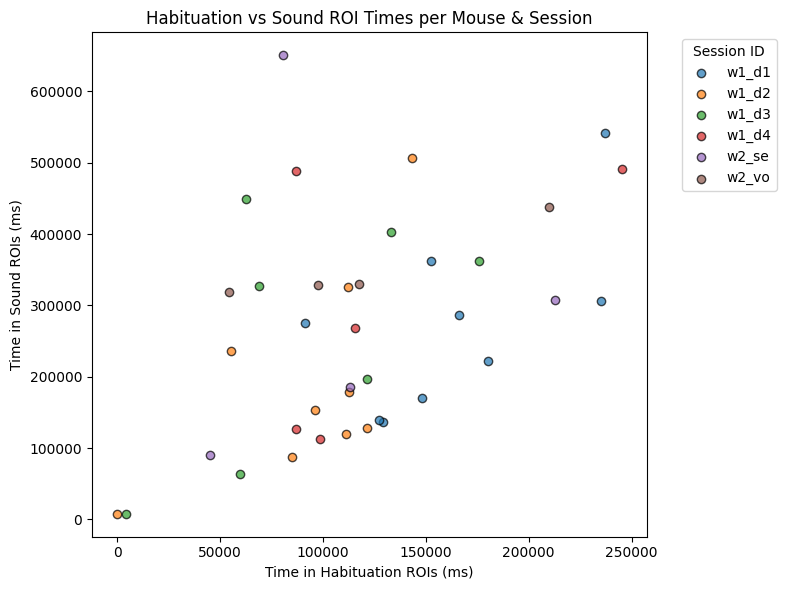

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your combined summary file (replace with your filename if already saved)
summary_df = pd.read_csv(main_dir+"/all_mice_summary.csv")

plt.figure(figsize=(8, 6))

# Scatter plot: each (mouse_ID, session_ID) is a point
for sid, sub in summary_df.groupby("session_ID"):
    plt.scatter(
        sub["time_in_habituation_rois_ms"],
        sub["time_in_sound_rois_ms"],
        label=sid,
        alpha=0.7,
        edgecolor="black"
    )

# Labels and title
plt.xlabel("Time in Habituation ROIs (ms)")
plt.ylabel("Time in Sound ROIs (ms)")
plt.title("Habituation vs Sound ROI Times per Mouse & Session")

# Legend on the side
plt.legend(title="Session ID", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


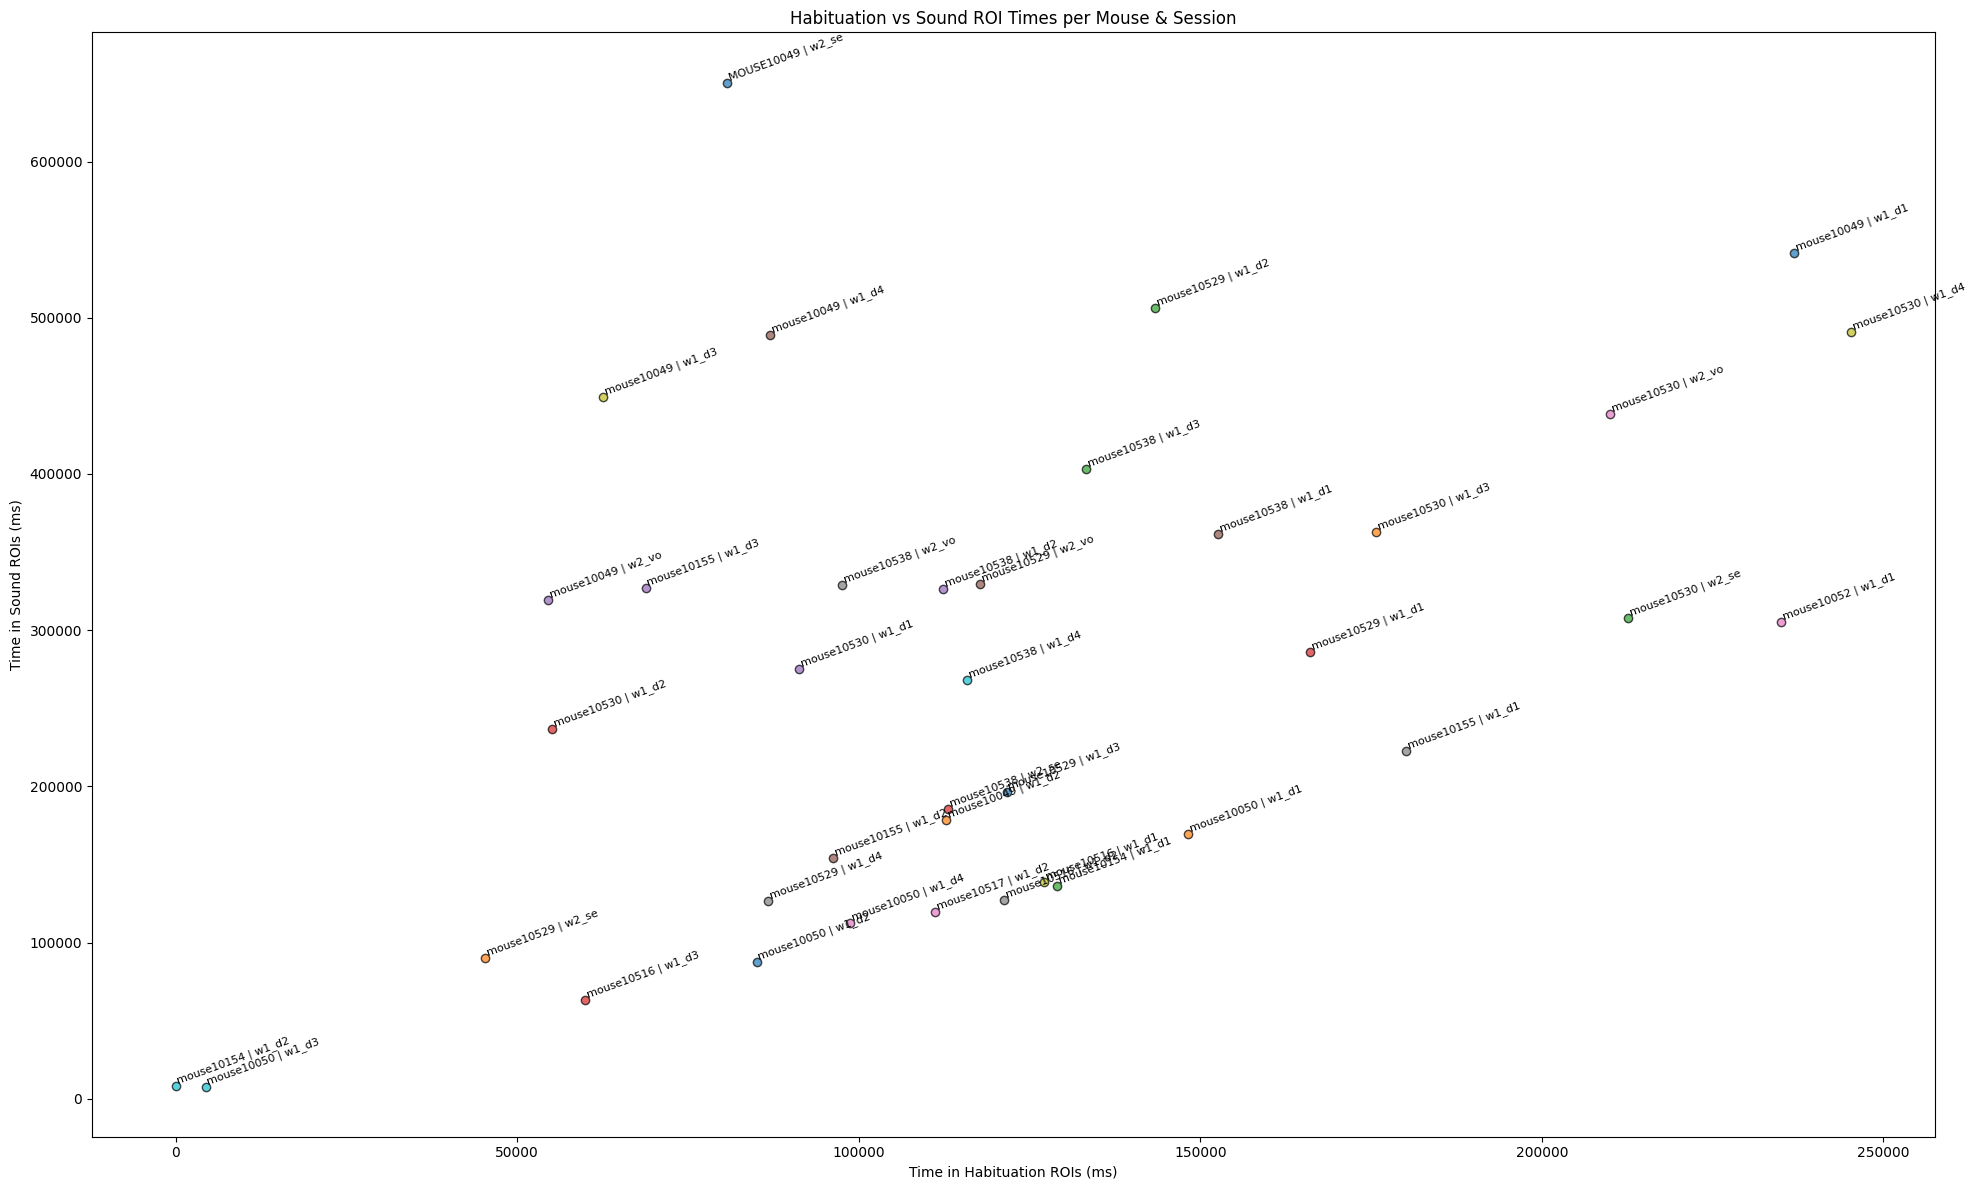

In [134]:


# Load your combined summary file
summary_df = pd.read_csv(main_dir+ "/all_mice_summary.csv")

plt.figure(figsize=(20, 12))

# Scatter plot
for _, row in summary_df.iterrows():
    x = row["time_in_habituation_rois_ms"]
    y = row["time_in_sound_rois_ms"]
    label = f"{row['mouse_ID']} | {row['session_ID']}"
    
    plt.scatter(x, y, alpha=0.7, edgecolor="black")
    plt.text(x, y, label, fontsize=8, ha="left", va="bottom", rotation=20)

# Labels and title
plt.xlabel("Time in Habituation ROIs (ms)")
plt.ylabel("Time in Sound ROIs (ms)")
plt.title("Habituation vs Sound ROI Times per Mouse & Session")

plt.tight_layout()
plt.show()


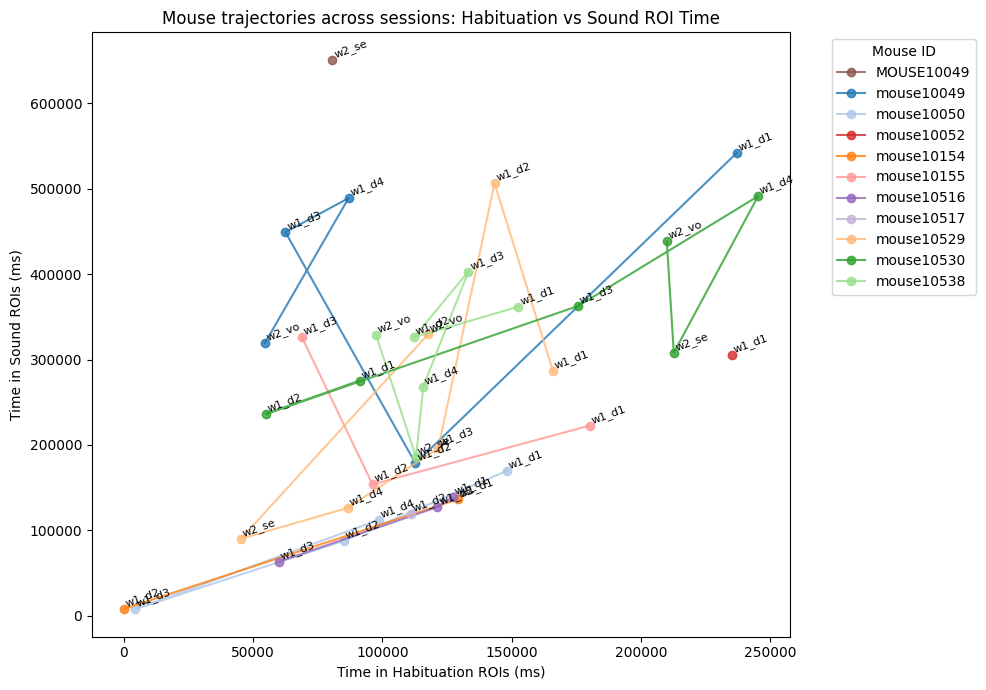

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your combined summary file
summary_df = pd.read_csv(main_dir+ "/all_mice_summary.csv")

plt.figure(figsize=(10, 7))

# Assign each mouse a unique color
colors = plt.cm.tab20.colors
mouse_ids = summary_df["mouse_ID"].unique()
color_map = {mid: colors[i % len(colors)] for i, mid in enumerate(mouse_ids)}

# Plot each mouse’s trajectory
for mid, sub in summary_df.groupby("mouse_ID"):
    sub = sub.sort_values("session_ID")  # sort sessions if you want them in order
    x = sub["time_in_habituation_rois_ms"]
    y = sub["time_in_sound_rois_ms"]
    
    plt.plot(x, y, marker="o", color=color_map[mid], label=mid, alpha=0.8)
    
    # Annotate each point with session_ID
    for _, row in sub.iterrows():
        plt.text(row["time_in_habituation_rois_ms"], 
                 row["time_in_sound_rois_ms"], 
                 row["session_ID"], fontsize=8, ha="left", va="bottom", rotation=20)

# Labels and title
plt.xlabel("Time in Habituation ROIs (ms)")
plt.ylabel("Time in Sound ROIs (ms)")
plt.title("Mouse trajectories across sessions: Habituation vs Sound ROI Time")

# Legend (mouse IDs)
plt.legend(title="Mouse ID", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


In [129]:
!pip install plotly

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------------- ------------------------- 3.7/9.8 MB 19.3 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.8 MB 19.1 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 17.2 MB/s  0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   -------------------- ------------------- 1/2 [plot

In [135]:
!pip install --upgrade nbformat


  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2025.4.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached attrs-25.3.0-py3-none-any.whl (63 kB)
Using cached jsonschema_specifications-2025.4.1-py3-none-any.whl (18 kB)
Using cached referencing-0.36.2-py3-none-any.whl (26 kB)

   ----------- ---------------------------- 2/7 [attrs]
   ----------- ---------------------------- 2/7 [attrs]
   ----------------- ---------------------- 3/7 [referencing]
   ---------------------------- ----------- 5/7 [jsonschema]
   ---------------------------- ----------- 5/7 [jsonschema]
   ---------------------------- ----------- 5/7 [jsonschema]
   ---------------------------------- ----- 6/7 [nbformat]
   ---------------------------------- ----- 6/7 [nbformat]
   ----

In [140]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

# Load your combined summary file
summary_df = pd.read_csv(main_dir+"/all_mice_summary.csv")

# Ensure a consistent session order if you want to connect them meaningfully
session_order = ["w1_d1", "w1_d2", "w1_d3", "w1_d4", "w2_se", "w2_vo"]
summary_df["session_ID"] = pd.Categorical(summary_df["session_ID"], categories=session_order, ordered=True)

# Create interactive line+scatter plot
fig = px.line(
    summary_df,
    x="time_in_habituation_rois_ms",
    y="time_in_sound_rois_ms",
    color="mouse_ID",
    text="session_ID",
    markers=True,
    line_group="mouse_ID",  # ensures lines connect within mouse
    hover_data=["mouse_ID", "session_ID"]
)

# Improve layout
fig.update_traces(textposition="top center")
fig.update_layout(
    title="Mouse trajectories across sessions: Habituation vs Sound ROI Time",
    xaxis_title="Time in Habituation ROIs (ms)",
    yaxis_title="Time in Sound ROIs (ms)",
    legend_title="Mouse ID",
    width=900,
    height=600
)

fig.show()


In [16]:
import plotly.express as px

df = pd.read_csv(main_dir+ "/all_mice_summary.csv")

# Calculate preference index
df["pref_idx"] = df["time_in_sound_rois_ms"] / df["time_in_silent_rois_ms"]

# Interactive scatter + line plot
fig = px.line(
    df.sort_values(["mouse_ID", "session_ID"]),
    x="time_in_habituation_rois_ms",
    y="pref_idx",
    color="mouse_ID",
    markers=True,
    text="session_ID",
    hover_data=["mouse_ID", "session_ID"]
)

fig.update_traces(textposition="top center")
fig.update_layout(
    title="Preference Index vs Habituation Time",
    xaxis_title="Time in Habituation ROIs (ms)",
    yaxis_title="Preference Index (Sound / Silent)",
    legend_title="Mouse ID",
    height=600
)

fig.show()


In [ ]:
# expand with cohort analysis & male vs female analysis vs age of the mice 
# also extract what the most time_spent roi was per mouse
# 

below is `get_time_in_maze`, the function that tidies up the csvs by adding the percentages, if the csvs have the time spent in the maze, but in case it's one of the unlucky csvs whose video is corrupted, it jsut gets the time of the trial and gets rid of useless stuff like the wave_array, and the end and start trial time

In [19]:


def get_time_in_maze(CSV_FILE): 

    df = pd.read_csv(CSV_FILE)

    # if time_in_maze_ms, it gets the whole percentage thing and also the time of the trial, but if we have the time of the trial then we don't go through this because it would recalculate stuff
    if "time_in_maze_ms" in df.columns and "total_time_trial_s" not in df.columns:
        # print(len(df.columns)+1)
        # here we get the total time of the trial (end_trial_time - trial_start_time)
        df.insert((len(df.columns)), "total_time_trial_s", df["end_trial_time"] - df["trial_start_time"])
        #we drop columns we don't need
        df = df.drop(["wave_arrays", "trial_start_time", "end_trial_time"], axis = 1)

        #just get the time in the rois in seconds
        df.insert(len(df.columns), "time_spent_s", round(df["time_spent"]/1000),2)
        #get the time in maze in seconds
        df.insert(len(df.columns), "time_in_maze_s", round(df["time_in_maze_ms"]/1000),2)


        #get some percentages
        df.insert(len(df.columns), "time_in_maze/total_trial_time(%)", round((df["time_in_maze_s"] /df["total_time_trial_s"])*100, 2))

        
        df.insert(len(df.columns), "time_in_roi/time_in_maze(%)", round((df["time_spent"]/df["time_in_maze_ms"])*100,2))

     # of end_trial_time is in the csv, it means that it doesn't have the time the mouse spent in the maze but it doesn't matter, we can still get the time of the trial
        
    elif "end_trial_time" in df.columns: 
        df.insert((len(df.columns)), "total_time_trial_s", df["end_trial_time"] - df["trial_start_time"])
        df = df.drop(["wave_arrays", "trial_start_time", "end_trial_time"], axis = 1)



    df.to_csv(CSV_FILE, index=False)

    


for i in trials_csvs:
    print(i)
    get_time_in_maze(i)

    




    





C:/Users/aleja/Box/Awake Project/Maze data/Auditory experiments/8_arms_w_voc (1)/w1_d1/time_2025-06-04_14_22_30mouse10049/trials_time_2025-06-04_14_22_30.csv
C:/Users/aleja/Box/Awake Project/Maze data/Auditory experiments/8_arms_w_voc (1)/w1_d1/time_2025-06-04_16_26_19mouse10050/trials_time_2025-06-04_16_26_19.csv
C:/Users/aleja/Box/Awake Project/Maze data/Auditory experiments/8_arms_w_voc (1)/w1_d1/time_2025-06-04_18_41_58mouse10154/trials_time_2025-06-04_18_41_58.csv
C:/Users/aleja/Box/Awake Project/Maze data/Auditory experiments/8_arms_w_voc (1)/w1_d1/time_2025-06-16_12_15_21mouse10529/trials_time_2025-06-16_12_15_21.csv
C:/Users/aleja/Box/Awake Project/Maze data/Auditory experiments/8_arms_w_voc (1)/w1_d1/time_2025-06-16_14_43_53mouse10530/trials_time_2025-06-16_14_43_53.csv
C:/Users/aleja/Box/Awake Project/Maze data/Auditory experiments/8_arms_w_voc (1)/w1_d1/time_2025-06-16_16_52_29mouse10538/trials_time_2025-06-16_16_52_29.csv
C:/Users/aleja/Box/Awake Project/Maze data/Auditory 

below is some random code to find the indices of mouseID from the file path

In [8]:
# # feature extraction for data analysis

# for i in trials_csvs:

    
#     index_m = int(i.find("mouse"))
#     end_mousen = int(index_m+9)

# #     print(i)

# #     # mouse_ID = i.find("mouse*")

# #     # # trial_time = 
# #     # print(mouse_ID)




# # print(index_m, end_mousen)
# # mouse_ID = [index_m:end_mousen]

# # print(mouse_ID)

# prova_str[index_m:end_mousen]